<a href="https://colab.research.google.com/github/Amirrezahmi/test/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -q http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar

In [ ]:
!tar -xvf VOCtrainval_06-Nov-2007.tar > /dev/null; echo " done."

 done.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers,models
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing import image

In [ ]:
df = pd.read_pickle("/content/multi.csv")
df.shape

(2501, 2)

In [ ]:
df.head()

,fn,cat_id
0,000012.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1,000017.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,000023.jpg,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,000026.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
4,000032.jpg,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
voc_classes = ['Aeroplane', 'Bicycle', 'Bird', 'Boat', 'Bottle',
               'Bus', 'Car', 'Cat', 'Chair', 'Cow', 'Diningtable',
               'Dog', 'Horse','Motorbike', 'Person', 'Pottedplant',
               'Sheep', 'Sofa', 'Train', 'Tvmonitor']

In [ ]:
len(voc_classes)

20

In [ ]:
import os

In [ ]:

from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
import numpy as np


# address
img_folder = "/content/VOCdevkit/VOC2007/JPEGImages/"

# generator
def data_generator(df, img_folder, batch_size, target_size):
    num_samples = df.shape[0]
    num_batches = num_samples // batch_size

    while True:
        for batch_idx in range(num_batches):
            batch_start = batch_idx * batch_size
            batch_end = (batch_idx + 1) * batch_size

            x_batch = []
            y_batch = []

            for i in range(batch_start, batch_end):
                img_name = df['fn'][i]
                label = df['cat_id'][i]

                img = image.load_img(img_folder + img_name, target_size=target_size)
                img = image.img_to_array(img)

                x_batch.append(img)
                y_batch.append(label)

            x_batch = np.array(x_batch)
            y_batch = np.array(y_batch)

            yield x_batch, y_batch

batch_size = 32
target_size = (320, 320)

data_gen = data_generator(df, img_folder, batch_size, target_size)

x_train, x_test, y_train, y_test = train_test_split(df.index.values, df['cat_id'], test_size=0.3, random_state=42)

train_indices, test_indices = train_test_split(range(len(df)), test_size=0.3, random_state=42)

def get_data(indices):
    x = []
    y = []
    for idx in indices:
        img_name = df['fn'][idx]
        label = df['cat_id'][idx]

        img = image.load_img(img_folder + img_name, target_size=target_size)
        img = image.img_to_array(img)

        x.append(img)
        y.append(label)

    x = np.array(x)
    y = np.array(y)

    return x, y


x_train, y_train = get_data(train_indices)
x_test, y_test = get_data(test_indices)

print("Training set - x:", x_train.shape, "y:", len(y_train))
print("Testing set - x:", x_test.shape, "y:", len(y_test))

Training set - x: (1750, 320, 320, 3) y: 1750
Testing set - x: (751, 320, 320, 3) y: 751


In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=7fc780517274ff11dfb43c689ad98a236f09e96a6d5bf04474840457dfd59d91
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Layer, Reshape
from tensorflow.keras.models import Model
import numpy as np
import skfuzzy as fuzz


class Type2FuzzyLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs, **kwargs):
        super(Type2FuzzyLayer, self).__init__(**kwargs)
        self.num_outputs = num_outputs
        self.fuzzy_variables = []
        self.rules = []
        self.aggregation_method = np.fmax  # Fuzzy rule aggregation method
        self.label_memberships = {
                                  'label1': {
                                      'low': (0, 0, 0.5),
                                      'medium': (0.25, 0.5, 0.75),
                                      'high': (0.5, 1, 1)
                                  },
                                  'label2': {
                                      'low': (0, 0, 0.3),
                                      'medium': (0.2, 0.5, 0.8),
                                      'high': (0.7, 1, 1)
                                  },
                                  'label3': {
                                      'low': (0, 0, 0.4),
                                      'medium': (0.3, 0.6, 0.9),
                                      'high': (0.6, 1, 1)
                                  },
                                  'label4': {
                                      'low': (0, 0, 0.2),
                                      'medium': (0.1, 0.4, 0.7),
                                      'high': (0.5, 1, 1)
                                  },
                                  'label5': {
                                      'low': (0, 0, 0.6),
                                      'medium': (0.4, 0.7, 1),
                                      'high': (0.8, 1, 1)
                                  },
                                  'label6': {
                                      'low': (0, 0, 0.3),
                                      'medium': (0.2, 0.5, 0.8),
                                      'high': (0.7, 1, 1)
                                  },
                                  'label7': {
                                      'low': (0, 0, 0.4),
                                      'medium': (0.3, 0.6, 0.9),
                                      'high': (0.6, 1, 1)
                                  },
                                  'label8': {
                                      'low': (0, 0, 0.2),
                                      'medium': (0.1, 0.4, 0.7),
                                      'high': (0.5, 1, 1)
                                  },
                                  'label9': {
                                      'low': (0, 0, 0.6),
                                      'medium': (0.4, 0.7, 1),
                                      'high': (0.8, 1, 1)
                                  },
                                  'label10': {
                                      'low': (0, 0, 0.5),
                                      'medium': (0.25, 0.5, 0.75),
                                      'high': (0.5, 1, 1)
                                  },
                                  'label11': {
                                      'low': (0, 0, 0.3),
                                      'medium': (0.2, 0.5, 0.8),
                                      'high': (0.7, 1, 1)
                                  },
                                  'label12': {
                                      'low': (0, 0, 0.4),
                                      'medium': (0.3, 0.6, 0.9),
                                      'high': (0.6, 1, 1)
                                  },
                                  'label13': {
                                      'low': (0, 0, 0.2),
                                      'medium': (0.1, 0.4, 0.7),
                                      'high': (0.5, 1, 1)
                                  },
                                  'label14': {
                                      'low': (0, 0, 0.6),
                                      'medium': (0.4, 0.7, 1),
                                      'high': (0.8, 1, 1)
                                  },
                                  'label15': {
                                      'low': (0, 0, 0.3),
                                      'medium': (0.2, 0.5, 0.8),
                                      'high': (0.7, 1, 1)
                                  },
                                  'label16': {
                                      'low': (0, 0, 0.4),
                                      'medium': (0.3, 0.6, 0.9),
                                      'high': (0.6, 1, 1)
                                  },
                                  'label17': {
                                      'low': (0, 0, 0.2),
                                      'medium': (0.1, 0.4, 0.7),
                                      'high': (0.5, 1, 1)
                                  },
                                  'label18': {
                                      'low': (0, 0, 0.6),
                                      'medium': (0.4, 0.7, 1),
                                      'high': (0.8, 1, 1)
                                  },
                                  'label19': {
                                      'low': (0, 0, 0.5),
                                      'medium': (0.25, 0.5, 0.75),
                                      'high': (0.5, 1, 1)
                                  },
                                  'label20': {
                                      'low': (0, 0, 0.3),
                                      'medium': (0.2, 0.5, 0.8),
                                      'high': (0.7, 1, 1)
                                  },
                              }

    def add_fuzzy_variable(self, name, label):
        # Create a fuzzy variable with given name and membership functions from label_memberships
        membership_functions = self.label_memberships.get(label)
        if membership_functions is not None:
            self.fuzzy_variables.append((name, membership_functions))


    def add_rule(self, antecedents, consequents):
        # Add a fuzzy rule with given antecedents and consequents
        self.rules.append((antecedents, consequents))

    def fuzzify(self, inputs):
        # Fuzzify the input data using the membership functions
        fuzzy_inputs = {}
        for i, (name, membership_functions) in enumerate(self.fuzzy_variables):
            fuzzy_inputs[name] = {}
            for j, membership_func in enumerate(membership_functions):
                fuzzy_inputs[name][f'A{j+1}'] = fuzz.interp_membership(inputs[i], membership_func)
        return fuzzy_inputs

    def infer(self, fuzzy_inputs):
        # Apply the fuzzy rules to perform inference
        outputs = {}
        for i in range(self.num_outputs):
            outputs[f'O{i+1}'] = np.zeros_like(fuzzy_inputs[list(fuzzy_inputs.keys())[0]]['A1'])
        for rule in self.rules:
            antecedents, consequents = rule
            activation_levels = [fuzzy_inputs[var][ant] for var, ant in antecedents]
            min_activation = self.aggregation_method(*activation_levels)
            for var, con in consequents:
                outputs[con] = np.fmax(outputs[con], min_activation)
        return outputs

    def type2_defuzzify(self, outputs):
        # Defuzzify the outputs to obtain Type 2 fuzzy values
        type2_outputs = {}
        for i in range(self.num_outputs):
            type2_outputs[f'O{i+1}'] = {}
            for j in range(outputs[f'O{i+1}'].shape[0]):
                alpha_cut_set = outputs[f'O{i+1}'][j, :]
                membership_func = fuzz.trimf(outputs[f'O{i+1}'][j, :], [np.min(alpha_cut_set), np.median(alpha_cut_set), np.max(alpha_cut_set)])
                type2_outputs[f'O{i+1}'][f'M{j+1}'] = membership_func
        return type2_outputs



def create_model(num_classes, input_shape=(320, 320, 3)):
    resnet50 = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)

    for layer in resnet50.layers:
        layer.trainable = False
    resnet_output = resnet50.output

    reshaped_output = Reshape((-1,))(resnet_output)
    x = tf.keras.layers.Dropout(0.5)(reshaped_output)

    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)

    # FuzzyLayer is added to the model
    fuzzy_output = Type2FuzzyLayer(num_classes, name='fuzzy_layer')(x)

    # Additional layers for further processing
    x = tf.keras.layers.Flatten()(fuzzy_output)

    x = tf.keras.layers.Dropout(0.2)(x)

    x = tf.keras.layers.Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=resnet50.input, outputs=x)

    return model

# Example usage
num_classes = 20

# Create the type 2 fuzzy layer and define membership functions and rules
type2_fuzzy_layer = Type2FuzzyLayer(num_classes)

# Define membership functions for each fuzzy variable (Type 2)
type2_fuzzy_layer.add_fuzzy_variable('animal', 'label1')
type2_fuzzy_layer.add_fuzzy_variable('human', 'label2')
type2_fuzzy_layer.add_fuzzy_variable('vehicle', 'label3')
type2_fuzzy_layer.add_fuzzy_variable('interior', 'label4')

# Add type 2 fuzzy rules
# Add type 2 fuzzy rules
type2_fuzzy_layer.add_rule([('animal', 'low')], [('Output1', 'low')])
type2_fuzzy_layer.add_rule([('animal', 'high')], [('Output1', 'high')])
type2_fuzzy_layer.add_rule([('human', 'low')], [('Output2', 'low')])
type2_fuzzy_layer.add_rule([('human', 'high')], [('Output2', 'high')])
type2_fuzzy_layer.add_rule([('vehicle', 'low')], [('Output3', 'low')])
type2_fuzzy_layer.add_rule([('vehicle', 'high')], [('Output3', 'high')])
type2_fuzzy_layer.add_rule([('interior', 'low')], [('Output4', 'low')])
type2_fuzzy_layer.add_rule([('interior', 'high')], [('Output4', 'high')])


# Create the model
model = create_model(num_classes)
model.get_layer('fuzzy_layer').set_weights(type2_fuzzy_layer.get_weights())

model.summary()
model.save('/content/model.h5')

94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 320, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 326, 326, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 160, 160, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Layer, Reshape
from tensorflow.keras.models import Model
import numpy as np
import skfuzzy as fuzz
from tensorflow.keras.models import load_model


class Type2FuzzyLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs, **kwargs):
        super(Type2FuzzyLayer, self).__init__(**kwargs)
        self.num_outputs = num_outputs
        self.fuzzy_variables = []
        self.rules = []
        self.aggregation_method = np.fmax  # Fuzzy rule aggregation method
        self.label_memberships = {
                                  'label1': {
                                      'low': (0, 0, 0.5),
                                      'medium': (0.25, 0.5, 0.75),
                                      'high': (0.5, 1, 1)
                                  },
                                  'label2': {
                                      'low': (0, 0, 0.3),
                                      'medium': (0.2, 0.5, 0.8),
                                      'high': (0.7, 1, 1)
                                  },
                                  'label3': {
                                      'low': (0, 0, 0.4),
                                      'medium': (0.3, 0.6, 0.9),
                                      'high': (0.6, 1, 1)
                                  },
                                  'label4': {
                                      'low': (0, 0, 0.2),
                                      'medium': (0.1, 0.4, 0.7),
                                      'high': (0.5, 1, 1)
                                  },
                                  'label5': {
                                      'low': (0, 0, 0.6),
                                      'medium': (0.4, 0.7, 1),
                                      'high': (0.8, 1, 1)
                                  },
                                  'label6': {
                                      'low': (0, 0, 0.3),
                                      'medium': (0.2, 0.5, 0.8),
                                      'high': (0.7, 1, 1)
                                  },
                                  'label7': {
                                      'low': (0, 0, 0.4),
                                      'medium': (0.3, 0.6, 0.9),
                                      'high': (0.6, 1, 1)
                                  },
                                  'label8': {
                                      'low': (0, 0, 0.2),
                                      'medium': (0.1, 0.4, 0.7),
                                      'high': (0.5, 1, 1)
                                  },
                                  'label9': {
                                      'low': (0, 0, 0.6),
                                      'medium': (0.4, 0.7, 1),
                                      'high': (0.8, 1, 1)
                                  },
                                  'label10': {
                                      'low': (0, 0, 0.5),
                                      'medium': (0.25, 0.5, 0.75),
                                      'high': (0.5, 1, 1)
                                  },
                                  'label11': {
                                      'low': (0, 0, 0.3),
                                      'medium': (0.2, 0.5, 0.8),
                                      'high': (0.7, 1, 1)
                                  },
                                  'label12': {
                                      'low': (0, 0, 0.4),
                                      'medium': (0.3, 0.6, 0.9),
                                      'high': (0.6, 1, 1)
                                  },
                                  'label13': {
                                      'low': (0, 0, 0.2),
                                      'medium': (0.1, 0.4, 0.7),
                                      'high': (0.5, 1, 1)
                                  },
                                  'label14': {
                                      'low': (0, 0, 0.6),
                                      'medium': (0.4, 0.7, 1),
                                      'high': (0.8, 1, 1)
                                  },
                                  'label15': {
                                      'low': (0, 0, 0.3),
                                      'medium': (0.2, 0.5, 0.8),
                                      'high': (0.7, 1, 1)
                                  },
                                  'label16': {
                                      'low': (0, 0, 0.4),
                                      'medium': (0.3, 0.6, 0.9),
                                      'high': (0.6, 1, 1)
                                  },
                                  'label17': {
                                      'low': (0, 0, 0.2),
                                      'medium': (0.1, 0.4, 0.7),
                                      'high': (0.5, 1, 1)
                                  },
                                  'label18': {
                                      'low': (0, 0, 0.6),
                                      'medium': (0.4, 0.7, 1),
                                      'high': (0.8, 1, 1)
                                  },
                                  'label19': {
                                      'low': (0, 0, 0.5),
                                      'medium': (0.25, 0.5, 0.75),
                                      'high': (0.5, 1, 1)
                                  },
                                  'label20': {
                                      'low': (0, 0, 0.3),
                                      'medium': (0.2, 0.5, 0.8),
                                      'high': (0.7, 1, 1)
                                  },
                              }

    def add_fuzzy_variable(self, name, label):
        # Create a fuzzy variable with given name and membership functions from label_memberships
        membership_functions = self.label_memberships.get(label)
        if membership_functions is not None:
            self.fuzzy_variables.append((name, membership_functions))


    def add_rule(self, antecedents, consequents):
        # Add a fuzzy rule with given antecedents and consequents
        self.rules.append((antecedents, consequents))

    def fuzzify(self, inputs):
        # Fuzzify the input data using the membership functions
        fuzzy_inputs = {}
        for i, (name, membership_functions) in enumerate(self.fuzzy_variables):
            fuzzy_inputs[name] = {}
            for j, membership_func in enumerate(membership_functions):
                fuzzy_inputs[name][f'A{j+1}'] = fuzz.interp_membership(inputs[i], membership_func)
        return fuzzy_inputs

    def infer(self, fuzzy_inputs):
        # Apply the fuzzy rules to perform inference
        outputs = {}
        for i in range(self.num_outputs):
            outputs[f'O{i+1}'] = np.zeros_like(fuzzy_inputs[list(fuzzy_inputs.keys())[0]]['A1'])
        for rule in self.rules:
            antecedents, consequents = rule
            activation_levels = [fuzzy_inputs[var][ant] for var, ant in antecedents]
            min_activation = self.aggregation_method(*activation_levels)
            for var, con in consequents:
                outputs[con] = np.fmax(outputs[con], min_activation)
        return outputs

    def type2_defuzzify(self, outputs):
        # Defuzzify the outputs to obtain Type 2 fuzzy values
        type2_outputs = {}
        for i in range(self.num_outputs):
            type2_outputs[f'O{i+1}'] = {}
            for j in range(outputs[f'O{i+1}'].shape[0]):
                alpha_cut_set = outputs[f'O{i+1}'][j, :]
                membership_func = fuzz.trimf(outputs[f'O{i+1}'][j, :], [np.min(alpha_cut_set), np.median(alpha_cut_set), np.max(alpha_cut_set)])
                type2_outputs[f'O{i+1}'][f'M{j+1}'] = membership_func
        return type2_outputs

# Register the custom layer
custom_objects = {'Type2FuzzyLayer': Type2FuzzyLayer}

# Load the model
model = load_model('/content/model.h5', custom_objects=custom_objects)


opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test), shuffle=True, callbacks=[callback])

Epoch 1/50
14/14 [==============================] - 55s 3s/step - loss: 1.0074 - accuracy: 0.2709 - val_loss: 0.2672 - val_accuracy: 0.5193
Epoch 2/50
14/14 [==============================] - 15s 1s/step - loss: 0.1718 - accuracy: 0.5891 - val_loss: 0.1531 - val_accuracy: 0.5659
Epoch 3/50
14/14 [==============================] - 16s 1s/step - loss: 0.0867 - accuracy: 0.6886 - val_loss: 0.1474 - val_accuracy: 0.5819
Epoch 4/50
14/14 [==============================] - 15s 1s/step - loss: 0.0536 - accuracy: 0.7211 - val_loss: 0.1615 - val_accuracy: 0.5912
Epoch 5/50
14/14 [==============================] - 15s 1s/step - loss: 0.0372 - accuracy: 0.7349 - val_loss: 0.1666 - val_accuracy: 0.6005
Epoch 6/50
14/14 [==============================] - 15s 1s/step - loss: 0.0297 - accuracy: 0.7457 - val_loss: 0.1811 - val_accuracy: 0.6019
Epoch 7/50
14/14 [==============================] - 15s 1s/step - loss: 0.0234 - accuracy: 0.7469 - val_loss: 0.1764 - val_accuracy: 0.5925
Epoch 8/50
14/14 [==

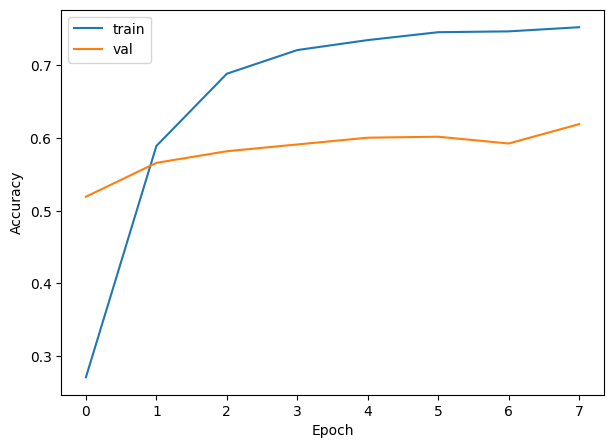

In [ ]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

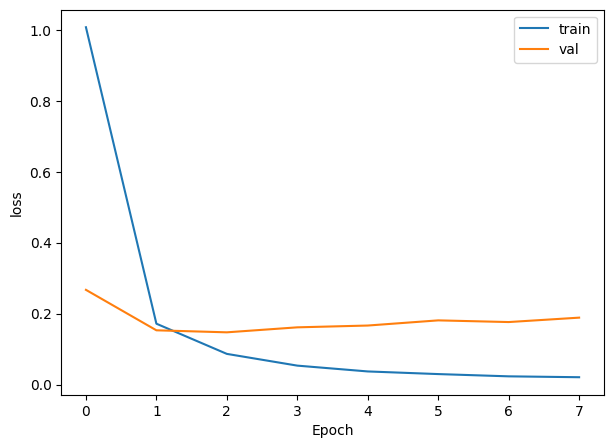

In [ ]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss    :', scores[0])
print('Test accuracy: %.2f%%' % (scores[1]*100))

24/24 [==============================] - 8s 230ms/step - loss: 0.1888 - accuracy: 0.6192
Test loss    : 0.1887972205877304
Test accuracy: 61.92%


In [ ]:
# Compute AP
Y_pred = model.predict(x_test)

24/24 [==============================] - 5s 172ms/step


In [ ]:
from sklearn.metrics import average_precision_score
mAP = average_precision_score(y_test, Y_pred, average='micro')
print(mAP)

0.8168439703069658


In [ ]:
from sklearn.metrics import average_precision_score

num_classes = y_test.shape[1]  # Number of classes

mAP_scores = []
for class_idx in range(num_classes):
    y_true = y_test[:, class_idx]  # True labels for the current class
    y_scores = Y_pred[:, class_idx]  # Predicted scores/confidence for the current class

    ap = average_precision_score(y_true, y_scores)
    mAP_scores.append(ap)

# Print mAP for each class
for class_idx, mAP in enumerate(mAP_scores):
    print(f"Class {class_idx}: mAP = {mAP}")

Class 0: mAP = 0.9608897569229295
Class 1: mAP = 0.8321484405221575
Class 2: mAP = 0.9330481119743855
Class 3: mAP = 0.6390533795509681
Class 4: mAP = 0.5169249520474695
Class 5: mAP = 0.673315473571618
Class 6: mAP = 0.8802379274963239
Class 7: mAP = 0.8661742187355311
Class 8: mAP = 0.5659205311752654
Class 9: mAP = 0.5616823030652163
Class 10: mAP = 0.5415102701019452
Class 11: mAP = 0.8503402730554762
Class 12: mAP = 0.9010077613657007
Class 13: mAP = 0.8383416803821292
Class 14: mAP = 0.9553191793280029
Class 15: mAP = 0.43285769504006455
Class 16: mAP = 0.42698813220940546
Class 17: mAP = 0.5920249487100279
Class 18: mAP = 0.8954346057997602
Class 19: mAP = 0.5348931779114103


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
Y_pred_multiclass = np.argmax(Y_pred, axis=1)
threshold = 0.5  # Adjust the threshold based on your problem
Y_pred_multilabel = (Y_pred > threshold).astype(int)

print(classification_report(y_test, Y_pred_multilabel))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        35
           1       0.92      0.63      0.75        35
           2       0.95      0.67      0.79        63
           3       1.00      0.27      0.43        22
           4       0.78      0.15      0.25        47
           5       0.88      0.39      0.54        36
           6       0.87      0.63      0.73       114
           7       0.97      0.66      0.78        44
           8       0.58      0.49      0.53        53
           9       0.67      0.08      0.15        24
          10       0.67      0.15      0.24        27
          11       1.00      0.53      0.70        58
          12       0.93      0.68      0.79        38
          13       1.00      0.47      0.64        38
          14       0.95      0.78      0.85       308
          15       0.60      0.17      0.27        35
          16       1.00      0.07      0.13        14
          17       0.71    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


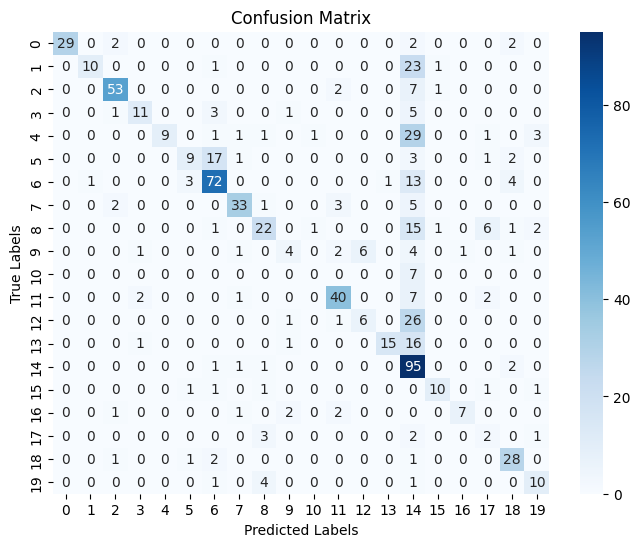

In [ ]:
from sklearn.metrics import confusion_matrix

# Convert multilabel-encoded true labels to multiclass format
y_test_multiclass = np.argmax(y_test, axis=1)

# Assuming Y_pred contains the predicted probabilities
Y_pred_multiclass = np.argmax(Y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test_multiclass, Y_pred_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cm is the confusion matrix computed earlier
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()